In [2]:
import numpy as np
import matplotlib.pyplot as plt
from classy import Class

In [3]:
def setup_class(parameter):
    """
    It sets up the CLASS code with the given cosmological parameter.
    """
    c = Class()
    c.set(parameter)
    return c

In [4]:
def get_lensed_cl(c, l):
    """
    It runs the CLASS code and aceessess the lensed cl until lmax=2500.
    """
    c.compute()
    cls = c.lensed_cl(l)
    return cls

In [5]:
def plot_tt_cmb_spectrum(c, l=2500, xscale='log', yscale='linear', T_cmb=2.72548, ax=None, color='r'):
    """
    It plots the Cosmic Microwave Background (CMB) angular power spectrum.
    This is TT power spectrum, i.e. temperature anisotropies.
    """
    cls = get_lensed_cl(c, l)
    ll = cls['ell'][2:]
    clTT = cls['tt'][2:]

    if ax is None:
        fig, ax = plt.subplots()

    ax.set_xscale(xscale)
    ax.set_yscale(yscale)
    ax.set_xlim(ll[0], ll[-1])
    ax.set_xlabel(r'$\ell$')
    ax.set_ylabel(r'$[\ell(\ell+1)/2\pi] C_\ell^\mathrm{TT}$  [$\mu$K$^2$]')
    ax.set_title("CMB angular power spectrum (TT)")

    # clTT*ll*(ll+1)/2./np.pi is dimensionless. To make it in units of K^2, we scale it with T_cmb.
    # x-axis = multipole moment, y-axis = power per ln(l), in units of K^2
    T_cmb_uK = T_cmb*1e6
    ax.plot(ll, clTT*ll*(ll+1)/2./np.pi*T_cmb_uK**2, color)


In [6]:
def plot_te_cmb_spectrum(c, l=2000, xscale='log', T_cmb=2.72548, ax1=None, ax2=None, color='r'):
    """
    It plots the Cosmic Microwave Background (CMB) angular power spectrum.
    This is TE power spectrum, i.e. temperature-polarization cross-correlation.
    """
    cls = get_lensed_cl(c, l)
    ll = cls['ell'][2:]
    clTE = cls['te'][2:]

    # clTE*ll*(ll+1)/2./np.pi is dimensionless. To make it in units of K^2, we scale it with T_cmb.
    T_cmb_uK = T_cmb*1e6
    scaled_clTE = clTE*ll*(ll+1)/2./np.pi*T_cmb_uK**2

    if ax1 is None or ax2 is None:
        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    ax1.set_xscale(xscale)
    ax1.set_xlim(ll[0], ll[-1])
    ax1.set_xlabel(r'$\ell$')
    ax1.set_ylabel(r'$[\ell(\ell+1)/2\pi] C_\ell^\mathrm{TE}$  [$\mu$K$^2$]', color='tab:blue')

    # Set the title here:
    ax1.set_title("CMB angular power spectrum (TE)")
    
    # Split the data at l = 30
    ll1 = ll[ll <= 30]
    ll2 = ll[ll > 30]
    scaled_clTE1 = scaled_clTE[ll <= 30]
    scaled_clTE2 = scaled_clTE[ll > 30]

    ax1.plot(ll1, scaled_clTE1, color)
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2.plot(ll2, scaled_clTE2, color)  # we already handled the x-label with ax1
    ax2.set_ylabel('second scale', color='tab:red')  # we already handled the x-label with ax1
    ax2.tick_params(axis='y', labelcolor='tab:red')


In [7]:
def plot_ee_cmb_spectrum(c, l=2000, xscale='log', T_cmb=2.72548, ax1=None, ax2=None, color='r'):
    """
    It plots the Cosmic Microwave Background (CMB) angular power spectrum.
    This is EE power spectrum, i.e. polarization-polarization.
    """
    cls = get_lensed_cl(c, l)
    ll = cls['ell'][2:]
    clEE = cls['ee'][2:]

    # clEE is dimensionless. To make it in units of K^2, we scale it with T_cmb.
    T_cmb_uK = T_cmb*1e6
    scaled_clEE = clEE*T_cmb_uK**2

    # Split the data at l = 30
    ll1 = ll[ll <= 30]
    ll2 = ll[ll > 30]
    scaled_clEE1 = scaled_clEE[ll <= 30]
    scaled_clEE2 = scaled_clEE[ll > 30]

    if ax1 is None or ax2 is None:
        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    ax1.set_xscale(xscale)
    ax1.set_xlim(ll[0], ll[-1])
    ax1.set_xlabel(r'$\ell$')
    ax1.set_ylabel(r'$C_\ell^\mathrm{EE}$  [$\mu$K$^2$]', color='tab:blue')

    # Set the title here:
    ax1.set_title("CMB angular power spectrum (EE)")

    ax1.plot(ll1, scaled_clEE1, color)
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2.plot(ll2, scaled_clEE2, color)  # we already handled the x-label with ax1
    ax2.set_ylabel('second scale', color='tab:red')  # we already handled the x-label with ax1
    ax2.tick_params(axis='y', labelcolor='tab:red')


In [8]:
def plot_lensing_cmb_spectrum(c, l=2500, xscale='log', yscale='linear', ax=None, color='r'):
    """
    It plots the Cosmic Microwave Background (CMB) angular power spectrum.
    This is lensing power spectrum.
    """
    cls = get_lensed_cl(c, l)
    ll = cls['ell'][2:]
    clPP = cls['pp'][2:]

    if ax is None:
        fig, ax = plt.subplots()

    ax.set_xscale(xscale)
    ax.set_yscale(yscale)
    ax.set_xlim(ll[0], ll[-1])
    ax.set_xlabel(r'$L$')
    ax.set_ylabel(r'$[[\ell(\ell+1)]^2/2\pi] C_\ell^\mathrm{PP}$  [$10^{-7}$]')
    ax.plot(ll, clPP*(ll*(ll+1))**2/2./np.pi, color)
    ax.set_title("CMB angular power spectrum (lensing)")

    if ax is None:
        fig.tight_layout()
        plt.show()




In [56]:
def plot_matter_spectrum(c, kmax, z_pk=0.0, ax=None, label=None, color='b'):
    """
    It plots the Matter power spectrum.
    """
    c.compute()
    kk = np.logspace(-5, np.log10(kmax), 1000) # k in h/Mpc
    Pk = [] # P(k) in (Mpc/h)**3
    h = c.h() # get reduced Hubble for conversions to 1/Mpc
    for k in kk:
        Pk.append(c.pk(k*h, z_pk)*h**3) # function .pk(k,z) returns P(k) in (Mpc/h)**3
    
    if ax is None:
        fig, ax = plt.subplots()
    
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim(kk[0], kk[-1])
    ax.set_xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
    ax.set_ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
    ax.set_title("Matter power spectrum")
    ax.plot(kk, Pk, color, label=label)
    ax.legend()


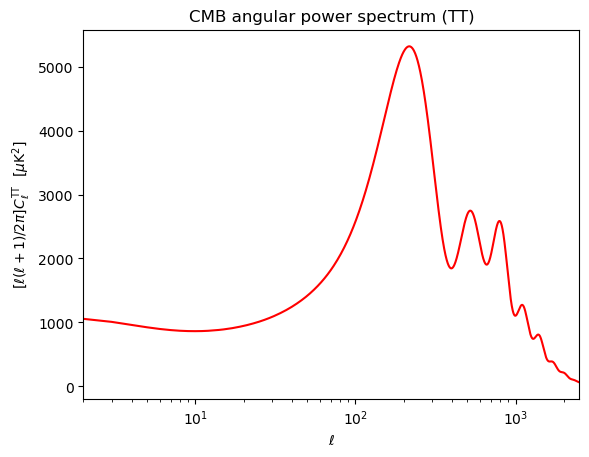

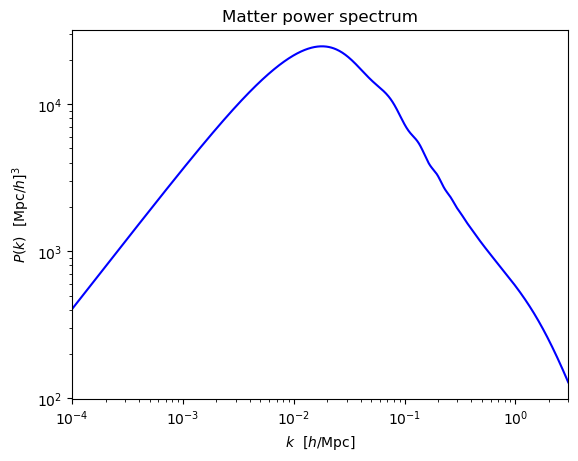

In [37]:
# Reproduce the result from tutorials (test)
example_params={
"T_cmb":2.7255,
"h":0.67,
"Omega_b":0.04,
"Omega_cdm":0.3,
"reio_parametrization": "reio_camb",
"z_reio":9,
"P_k_ini type": "analytic_Pk",
"A_s": 2.2e-9,
"n_s": 0.96,
"lensing": "yes",
"non linear": "halofit",
"output": "tCl,pCl,lCl,mPk",
"modes":"s",
"P_k_max_1/Mpc":3.0
}
example = setup_class(example_params)
plot_tt_cmb_spectrum(example)
plot_matter_spectrum(example)

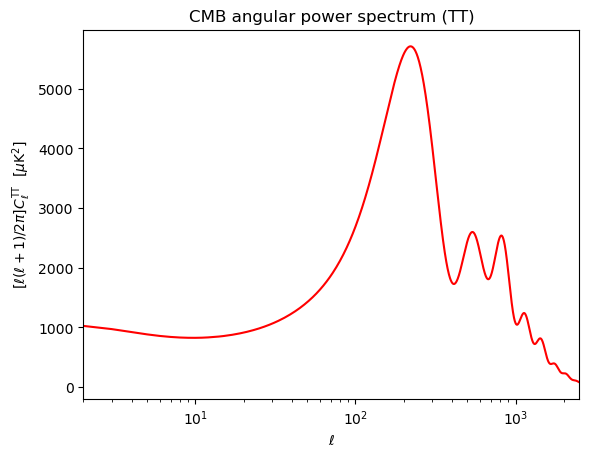

In [11]:
# Cold dark matter model from paper: Planck Sattellite Planck 2018; arXiv:1807.06211
# Want to reproduce the four plots in Fig. 1

# Data from TT+lowE
params_cold_TT = {
    "output": 'tCl pCl lCl mPk',
    "lensing": 'yes', 
    "omega_cdm": 0.1206,
    "omega_b": 0.02212, 
    "H0": 66.88, 
    "A_s": np.exp(3.040)/10**10, #ln10^{10}A_s=3.040
    "n_s": 0.9626,
    "tau_reio": 0.0522,
    #"P_k_max_1/Mpc": 2.0,
    "T_cmb": 2.72548
}
cold_TT = setup_class(params_cold_TT)
plot_tt_cmb_spectrum(cold_TT)

# Question: Use data from TT+lowE or TT,TE,EE+lowE+lensing?
# Do comparisons later

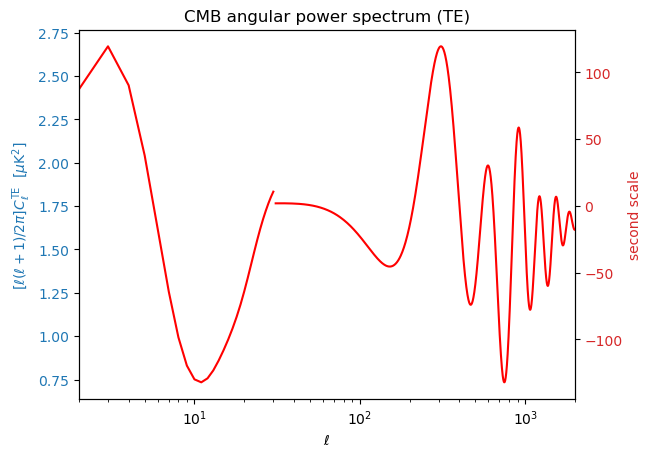

In [12]:
# Data from TE+lowE

# Divide into two parts: l<30, and 200>l>30
params_cold_TE = {
    "output": 'tCl pCl lCl mPk',
    "lensing": 'yes', 
    "omega_cdm": 0.1177,
    "omega_b": 0.02249, 
    "H0": 68.44, 
    "A_s": np.exp(3.018)/10**10, #ln10^{10}A_s=3.018
    "n_s": 0.967,
    "tau_reio": 0.0496,
    #"P_k_max_1/Mpc": 2.0,
    "T_cmb": 2.72548
}

cold_TE = setup_class(params_cold_TE)
plot_te_cmb_spectrum(cold_TE)


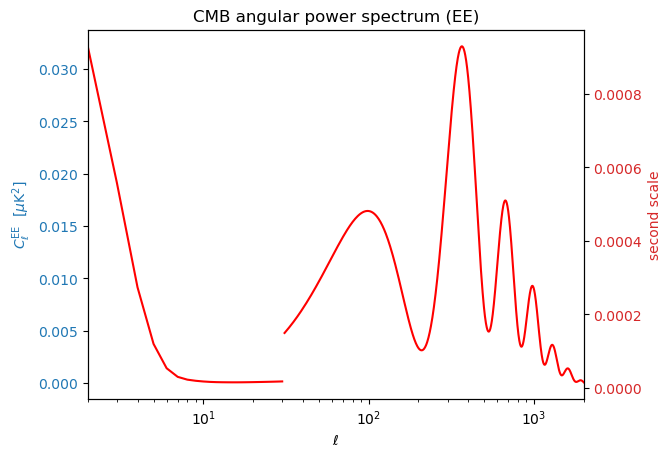

In [13]:
# Data from EE+lowE

# Divide into two parts: l<30, and 200>l>30
params_cold_EE = {
    "output": 'tCl pCl lCl mPk',
    "lensing": 'yes', 
    "omega_cdm": 0.1158,
    "omega_b": 0.0240, 
    "H0": 69.9, 
    "A_s": np.exp(3.052)/10**10, #ln10^{10}A_s=3.052
    "n_s": 0.980,
    "tau_reio": 0.0527,
    #"P_k_max_1/Mpc": 2.0,
    "T_cmb": 2.72548
}

cold_EE = setup_class(params_cold_EE)
plot_ee_cmb_spectrum(cold_EE)

Exception ignored in: Traceback (most recent call last):
  File "classy.pyx", line 208, in classy.Class.struct_cleanup
TypeError: argument of type 'NoneType' is not iterable
'classy.Class.__dealloc__'
Traceback (most recent call last):
  File "classy.pyx", line 208, in classy.Class.struct_cleanup
TypeError: argument of type 'NoneType' is not iterable
Traceback (most recent call last):
  File "classy.pyx", line 208, in classy.Class.struct_cleanup
TypeError: argument of type 'NoneType' is not iterable
Exception ignored in: 'classy.Class.__dealloc__'
Traceback (most recent call last):
  File "classy.pyx", line 208, in classy.Class.struct_cleanup
TypeError: argument of type 'NoneType' is not iterable
Traceback (most recent call last):
Exception ignored in: 'classy.Class.__dealloc__'
Traceback (most recent call last):
  File "classy.pyx", line 208, in classy.Class.struct_cleanup
  File "classy.pyx", line 208, in classy.Class.struct_cleanup
TypeError: argument of type 'NoneType' is not itera

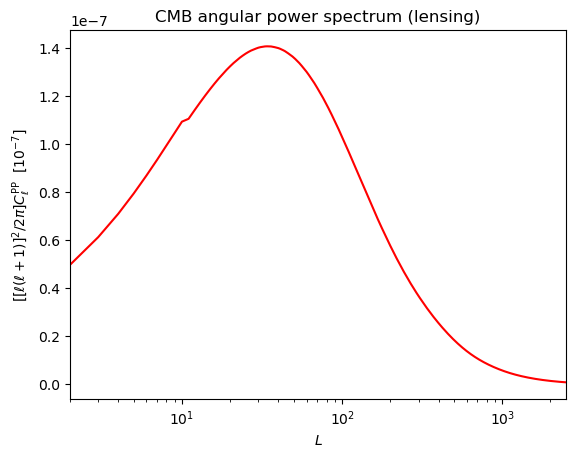

In [21]:
# Data from TT+TE+EE+lowE+lensing
params_cold_lensing = {
    "output": 'tCl pCl lCl mPk',
    "lensing": 'yes', 
    "omega_cdm": 0.1200,
    "omega_b": 0.02237, 
    "H0": 67.36, 
    "A_s": np.exp(3.044)/10**10, #ln10^{10}A_s=3.044
    "n_s": 0.9649,
    "tau_reio": 0.0544,
    #"P_k_max_1/Mpc": 2.0,
    "T_cmb": 2.72548
}
cold_lensing = setup_class(params_cold_lensing)
plot_lensing_cmb_spectrum(cold_lensing)

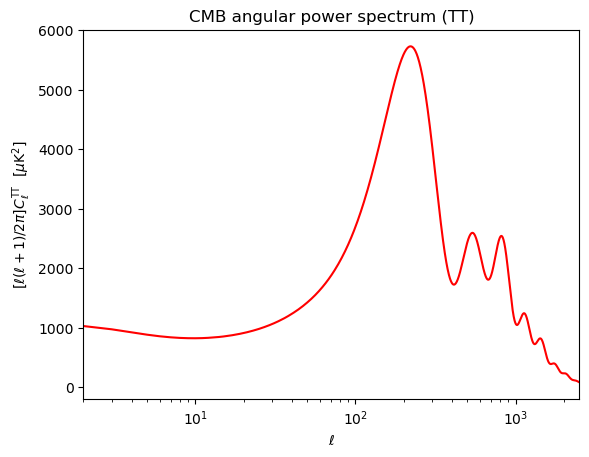

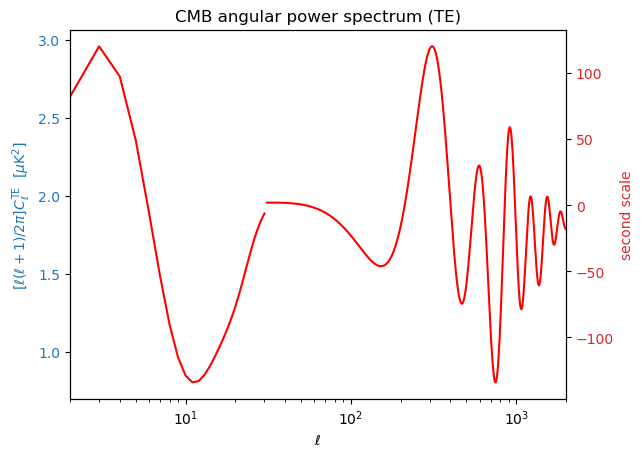

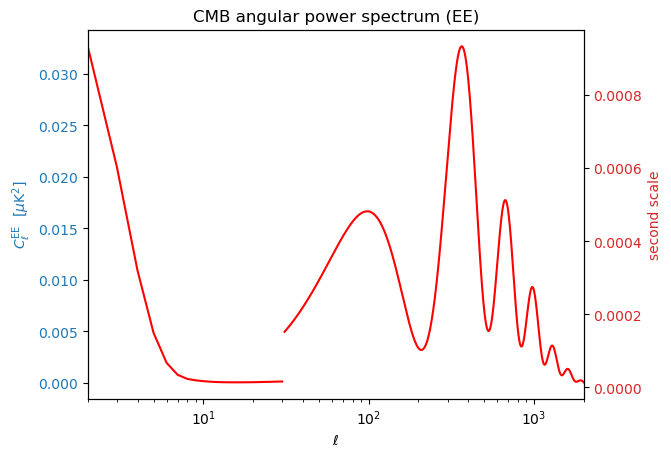

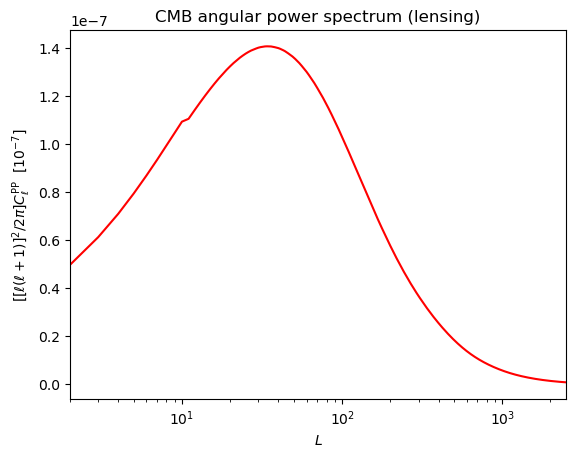

In [11]:
# Use TT,TE,EE+lowE+lensing

# TT
plot_tt_cmb_spectrum(cold_lensing)
# TE
plot_te_cmb_spectrum(cold_lensing)
# EE
plot_ee_cmb_spectrum(cold_lensing)
# Lensing
plot_lensing_cmb_spectrum(cold_lensing)


Notice the "discontinuity" at l=30 for TE and EE. 

The discontinuity at l=30 is likely due to the transition from the large angular scale (low l) to small angular scale (high l) regime. The large angular scale (l<30) Cosmic Microwave Background (CMB) polarization is dominated by the so-called reionization bump. This is the result of Thomson scattering of CMB photons off free electrons created by the reionization of hydrogen in the intergalactic medium at late times in the history of the Universe (z ~ 10), which leads to the large-angle polarization pattern.

On the other hand, the small angular scale (l>30) CMB polarization is mainly due to the acoustic oscillations in the photon-baryon fluid at the last scattering surface (z ~ 1100), which is much earlier than the epoch of reionization.

Therefore, it's quite normal to see a transition at around l=30 in the CMB polarization spectra (both TE and EE), which is not actually a discontinuity, but rather a transition between two different physical mechanisms.

However, keep in mind that the specific choice of l=30 as the transition point is somewhat arbitrary. It could be slightly higher or lower depending on the specifics of the cosmological model and the precision of the measurements.

Also, sometimes, the data processing or plotting routines might artificially introduce some apparent discontinuity. Always make sure that it is not due to some artifacts of the tools you are using.

Next step: To analyze how different parameters might change power spectrum. 

1. The spectral index, n_s: The spectral index describes the initial power spectrum of fluctuations, with n_s = 1 corresponding to a scale-invariant spectrum (as predicted by the simplest inflationary models). Deviations from 1 indicate a scale dependence to the primordial power spectrum. If n_s > 1, there is more power on small scales, and if n_s < 1, there is more power on large scales.

2. The amplitude of fluctuations, A_s: This parameter represents the amplitude of the primordial power spectrum of fluctuations. A higher value of A_s leads to larger temperature anisotropies in the CMB.

3. The baryon density, ω_b: The amount of baryonic matter influences the acoustic oscillations in the photon-baryon fluid before recombination. More baryons make the potential wells deeper, leading to a higher first peak in the CMB power spectrum and affecting the relative heights of the peaks.

4. The dark matter density, ω_cdm: Dark matter also influences the height of the peaks in the power spectrum, because it contributes to the overall matter density and therefore the gravitational potential wells.

5. The Hubble constant, H0: The Hubble constant influences the size of the sound horizon at recombination, and hence the angular scale (i.e., the position in l) of the peaks of the power spectrum.

6. The reionization optical depth, τ: Early star formation in the universe can ionize the hydrogen in the intergalactic medium, leading to a process known as reionization. This introduces an additional source of photon scattering, which suppresses the power spectrum at large scales (small l).

In [13]:
def compare_parameters(initial_param, new_param, param_name):
    # Setup the initial and new cosmology
    c_initial = setup_class(initial_param)
    c_new = setup_class(new_param)

    # Set up the figure and the array of axes
    fig, ax_arr = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

    # Create twin axes for TE and EE plots
    ax_arr_twin = np.array([[ax.twinx() for ax in row] for row in ax_arr])

    # Set the colors for the initial and new datasets
    color_initial = 'r'
    color_new = 'b'

    # Plot TT power spectrum
    plot_tt_cmb_spectrum(c_initial, ax=ax_arr[0, 0], color=color_initial)
    plot_tt_cmb_spectrum(c_new, ax=ax_arr[0, 0], color=color_new)

    # Plot TE power spectrum
    plot_te_cmb_spectrum(c_initial, ax1=ax_arr[0, 1], ax2=ax_arr_twin[0, 1], color=color_initial)
    plot_te_cmb_spectrum(c_new, ax1=ax_arr[0, 1], ax2=ax_arr_twin[0, 1], color=color_new)

    # Plot EE power spectrum
    plot_ee_cmb_spectrum(c_initial, ax1=ax_arr[1, 0], ax2=ax_arr_twin[1, 0], color=color_initial)
    plot_ee_cmb_spectrum(c_new, ax1=ax_arr[1, 0], ax2=ax_arr_twin[1, 0], color=color_new)

    # Plot Lensing power spectrum
    plot_lensing_cmb_spectrum(c_initial, ax=ax_arr[1, 1], color=color_initial)
    plot_lensing_cmb_spectrum(c_new, ax=ax_arr[1, 1], color=color_new)

    # Set the title and show the figure
    fig.suptitle(f'Comparison of CMB power spectra with different {param_name}', fontsize=16)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    plt.show()





In [14]:
def generate_new_params(original_params, param_to_update, new_value):
    """
    Create a new parameter dictionary based on original_params, but with
    param_to_update changed to new_value. The original_params dictionary
    is not modified.
    
    Args:
        original_params: The original parameter dictionary.
        param_to_update: The parameter to change.
        new_value: The new value for param_to_update.
        
    Returns:
        new_params: A new parameter dictionary with the updated value.
    """
    new_params = original_params.copy()  # make a copy of the original parameters
    new_params[param_to_update] = new_value  # update the parameter
    return new_params


Recall the original data value. 

params_cold_lensing = {
    "output": 'tCl pCl lCl mPk',
    "lensing": 'yes', 
    "omega_cdm": 0.1200,
    "omega_b": 0.02237, 
    "H0": 67.36, 
    "A_s": np.exp(3.044)/10**10, #ln10^{10}A_s=3.044
    "n_s": 0.9649,
    "tau_reio": 0.0544,
    #"P_k_max_1/Mpc": 2.0,
    "T_cmb": 2.72548
}

Here are some possible ranges for these cosmological parameters. These are broadly accepted ranges, based on the latest observational data, as of my last training cut-off in 2021.

1. Baryon density parameter (Omega_b h^2): You can vary this around 0.022. Try values in the range of 0.020 to 0.024.

2. Cold dark matter density parameter (Omega_c h^2): A common range of values to consider might be between 0.112 and 0.128, with a central value around 0.120.

3. Scalar spectral index (n_s): Try values in the range of 0.94 to 0.98. The Planck 2018 results had a central value of around 0.965.

4. The amplitude of the primordial power spectrum (A_s or ln(10^10 A_s)): The accepted value from Planck 2018 is about 2.1e-9, so you could consider a range from about 2.0e-9 to 2.2e-9.

5. Hubble constant (H0): This parameter has been a topic of ongoing debate in the cosmology community due to the discrepancy between the results from the early universe (like the Planck satellite) and late universe measurements. You can try a range of values from 60 to 75 (in units of km/s/Mpc).

6. Reionization optical depth (tau): Planck 2018 results suggest a value around 0.054, so you might consider a range of values from 0.04 to 0.06.

Remember, these are not strict bounds, and the "true" cosmological values may lie outside these ranges. Also, cosmological parameters are interconnected, so changing one may affect the others. This is the purpose of using codes like CLASS, to see the impact of these parameters on the power spectrum and fit the data best.

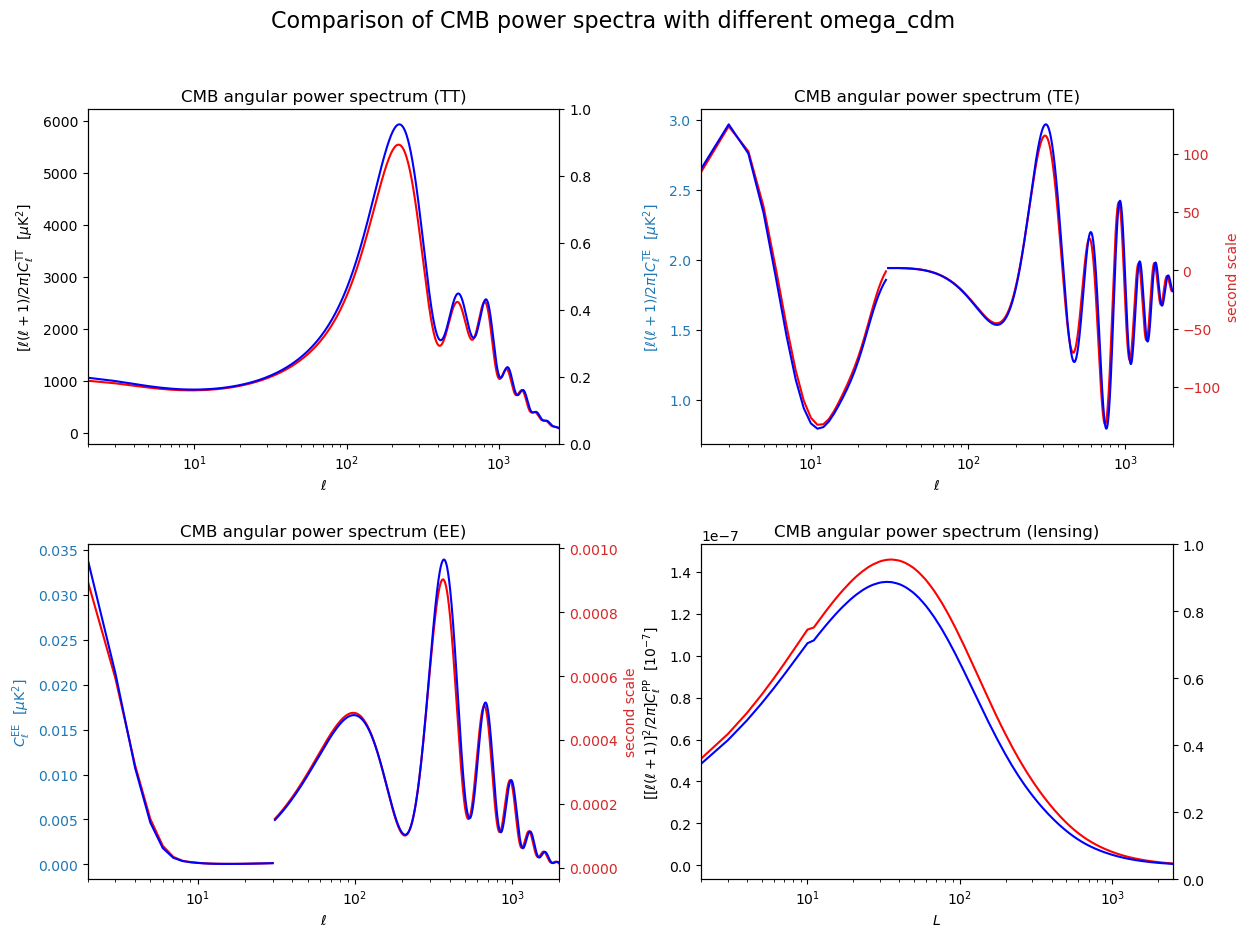

In [30]:
# omega_cdm: 0.112 vs 0.128
compare_parameters(generate_new_params(params_cold_lensing, 'omega_cdm', 0.128), generate_new_params(params_cold_lensing, 'omega_cdm', 0.112), 'omega_cdm')

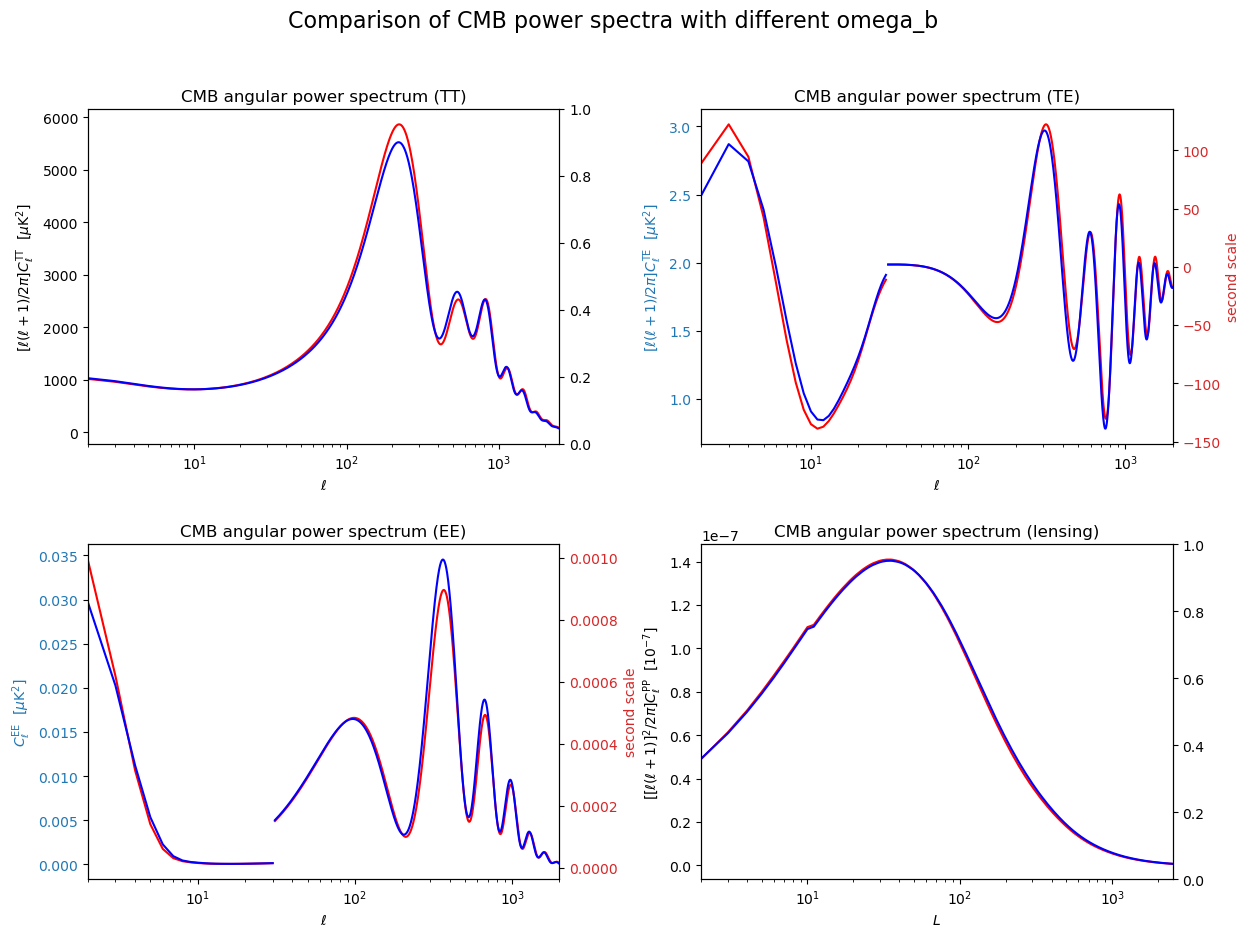

In [31]:
# omega_b: 0.020 vs 0.024
compare_parameters(generate_new_params(params_cold_lensing, 'omega_b', 0.024), generate_new_params(params_cold_lensing, 'omega_b', 0.020), 'omega_b')

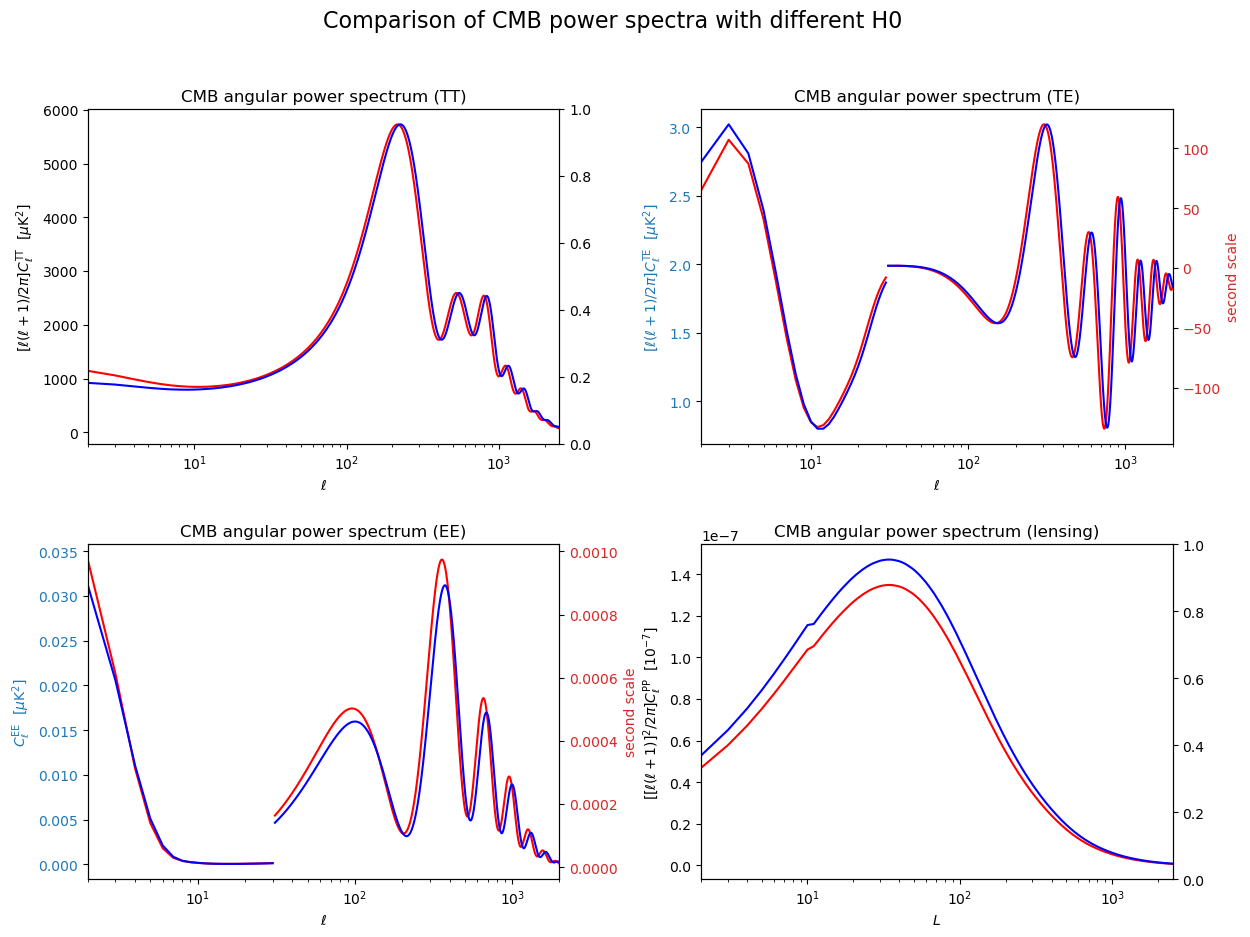

In [33]:
# H0: 60 vs. 75
compare_parameters(generate_new_params(params_cold_lensing, 'H0', 75), generate_new_params(params_cold_lensing, 'H0', 60), 'H0')

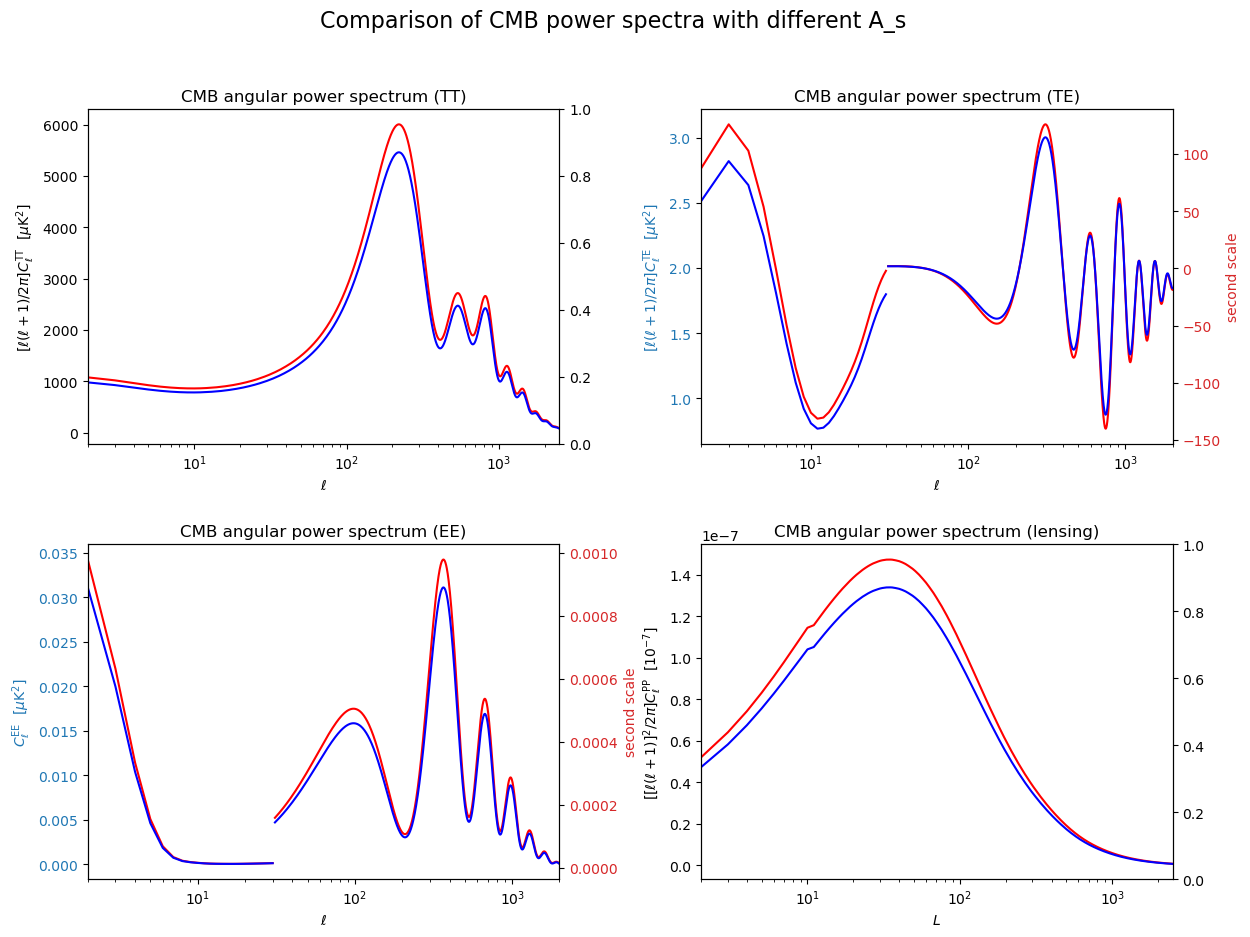

In [15]:
# A_s: 2.0e-9 vs. 2.2e-9
compare_parameters(generate_new_params(params_cold_lensing, 'A_s', 2.2e-9), generate_new_params(params_cold_lensing, 'A_s', 2.0e-9), 'A_s')

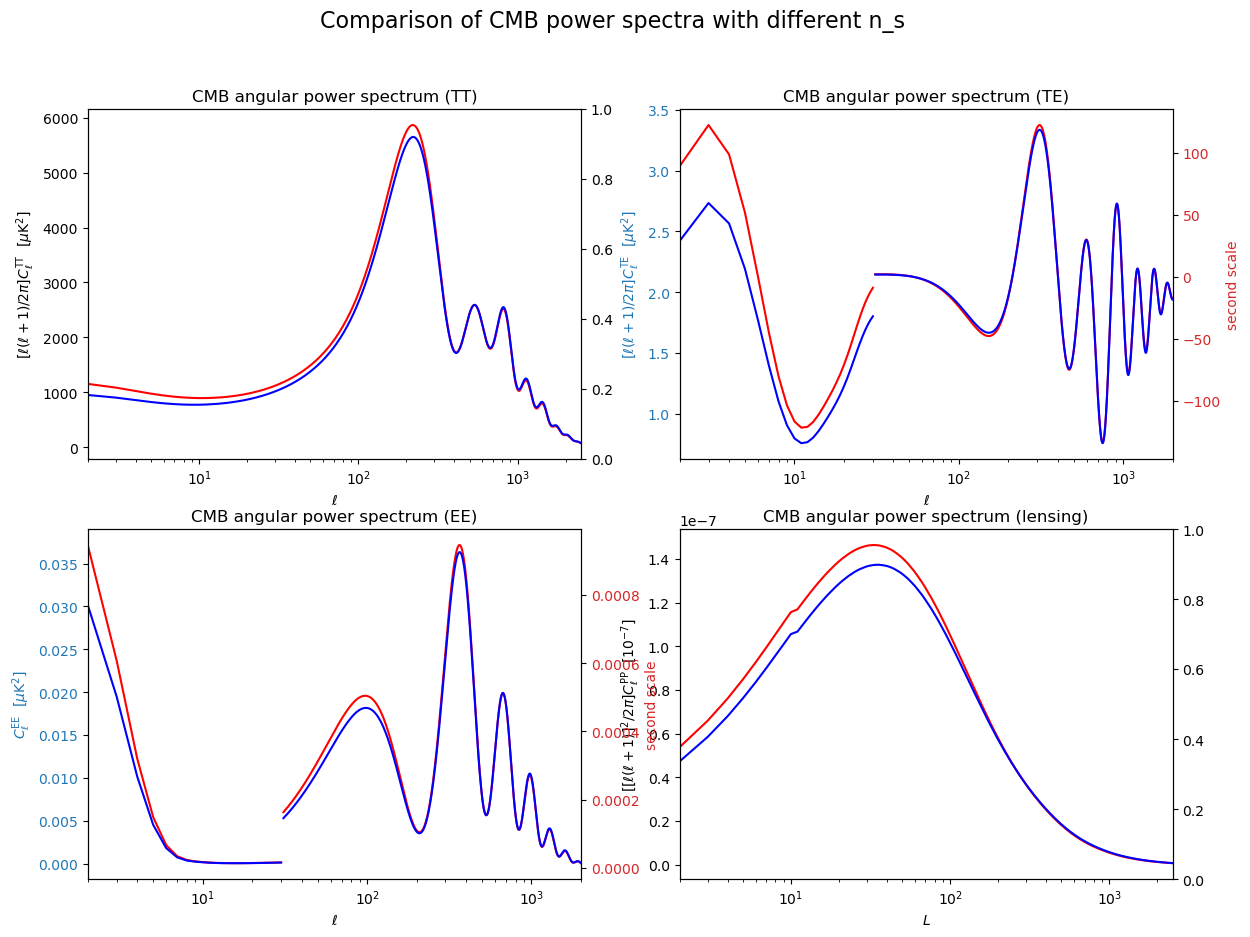

In [25]:
# n_s: 0.94 vs. 0.98
compare_parameters(generate_new_params(params_cold_lensing, 'n_s', 0.94), generate_new_params(params_cold_lensing, 'n_s', 0.98), 'n_s')

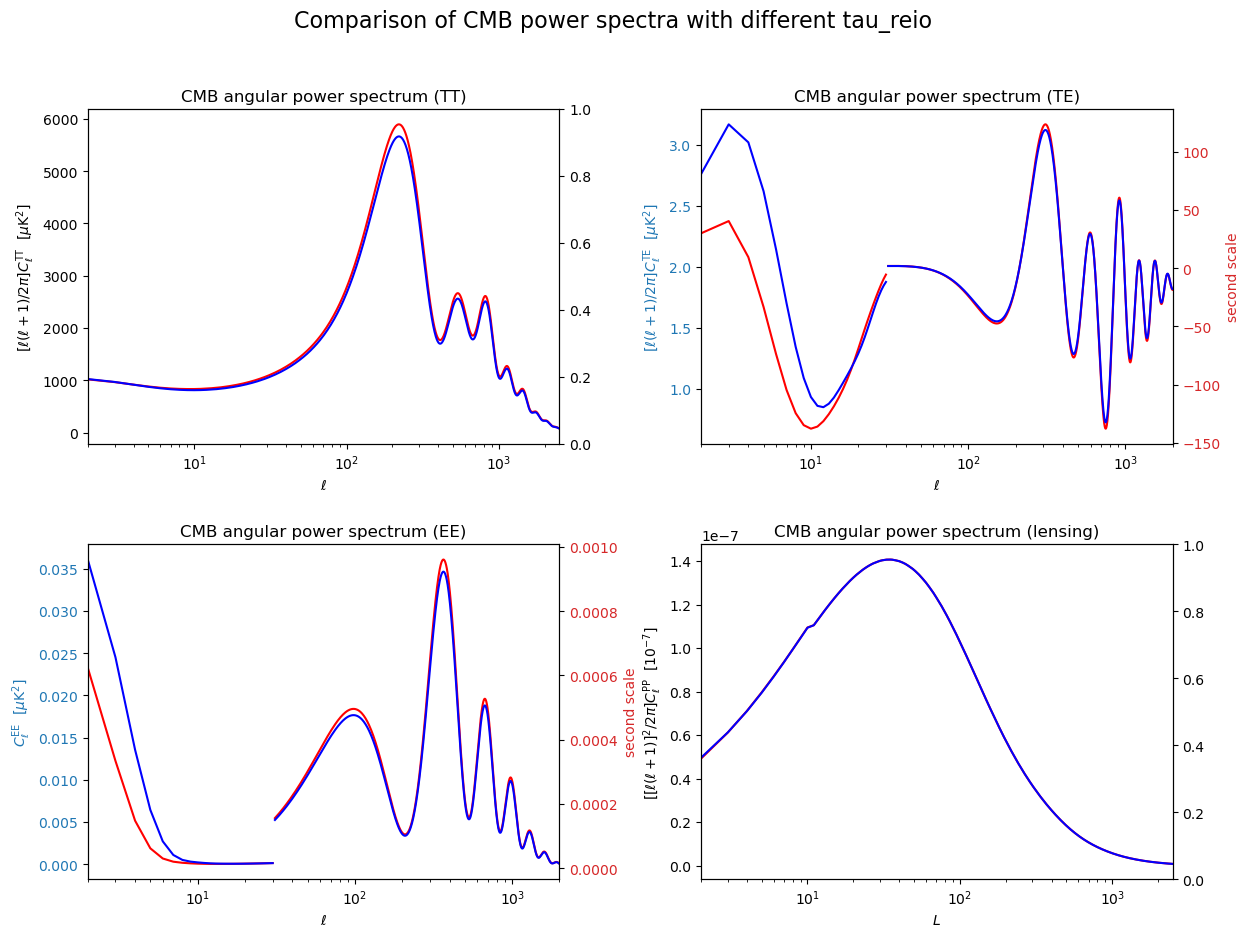

In [16]:
# tau_reio: 0.04 vs. 0.06
compare_parameters(generate_new_params(params_cold_lensing, 'tau_reio', 0.04), generate_new_params(params_cold_lensing, 'tau_reio', 0.06), 'tau_reio')

Begin to look at Matter Power Spectrum. 

The power spectrum P(k) is defined in terms of the Fourier transform of the correlation function of the density field. The variable k is the wavenumber, which is related to the wavelength (or equivalently, scale) of a given mode in the density field. 

In more physical terms, the power spectrum quantifies the strength of gravitational clustering over different length scales. A peak in the matter power spectrum indicates a preferred scale for the distribution of matter.

In the standard cosmological model, there is a characteristic "peak" in the matter power spectrum. This is a relic of acoustic oscillations in the early universe, and is closely related to the peaks in the Cosmic Microwave Background (CMB) power spectrum. This peak is often referred to as the "turnover scale" and marks the scale of the horizon at matter-radiation equality.

On smaller scales (larger k), the power spectrum follows a power-law distribution with a slope that depends on the nature of the dark matter. In the simplest models with only cold dark matter, the slope is -3. On larger scales (smaller k), the power spectrum is approximately flat, indicating a scale-invariant spectrum of fluctuations, as predicted by many models of inflation.

The precise shape of the power spectrum is sensitive to various cosmological parameters, including the total matter density, the baryon density, the Hubble constant, and the properties of dark energy. This makes it a powerful probe of cosmology.

The matter power spectrum can be measured from large-scale structure surveys, like galaxy surveys or lensing surveys, which map the distribution of matter in the universe.

Keep in mind that the matter power spectrum often needs to be derived indirectly. For instance, we don't observe the dark matter distribution in the universe directly. Instead, we observe the distribution of galaxies, which are biased tracers of the underlying dark matter. The relationship between the galaxy distribution and the underlying matter distribution is a complex one, and understanding this "bias" is a major part of modern cosmological research.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


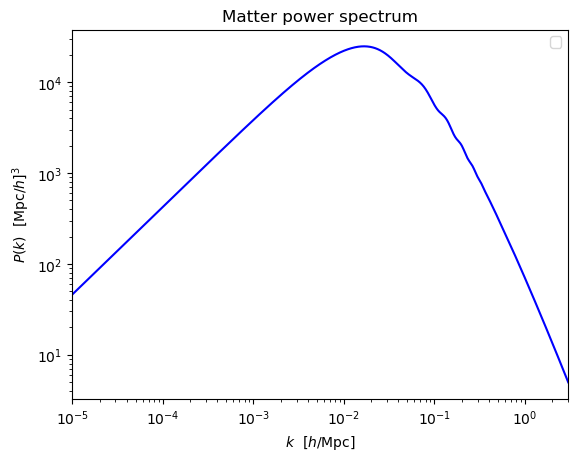

In [59]:
params = {
    "output": 'tCl,pCl,lCl,mPk',
    "lensing": 'yes', 
    "omega_cdm": 0.1200,
    "omega_b": 0.02237, 
    "H0": 67.36, 
    "A_s": np.exp(3.044)/10**10, #ln10^{10}A_s=3.044
    "n_s": 0.9649,
    "tau_reio": 0.0544,
    "P_k_max_1/Mpc": 3.0,
    "T_cmb": 2.72548, 
    "z_pk": 0.0
}
cdm_model = setup_class(params)
plot_matter_spectrum(cdm_model, params["P_k_max_1/Mpc"], params["z_pk"])

The matter power spectrum, P(k), describes the distribution of matter on large scales in the universe. It is essentially a measure of the amplitude of mass fluctuations or variations in the density of matter in the universe. The power spectrum P(k) gives the amplitude of such fluctuations as a function of scale, where the scale is denoted by the wave number k (which is related to the wavelength by k = 2π/λ).

Several cosmological parameters can affect the shape and amplitude of the matter power spectrum:

Total matter density (Ωm): The overall normalization of the power spectrum increases with increasing matter density. More matter leads to more structure on all scales.

Dark Matter density (Ωcdm): The dark matter density parameter is one of the key determinants of the matter power spectrum. More dark matter would lead to more structure formation and hence an overall increase in the power spectrum.

Baryon density (Ωb): Higher baryon densities also increase the overall normalization of the power spectrum. However, baryons also suppress power on small scales due to Silk damping, a process where radiation pressure before recombination prevents baryons from falling into potential wells, thereby smoothing out small-scale fluctuations.

Hubble parameter (H0): The Hubble parameter controls the rate of expansion of the universe and hence the epoch at which structure formation begins. Higher values of H0 lead to earlier structure formation and more power on small scales.

Scalar spectral index (ns): The scalar spectral index describes the initial conditions of the universe, specifically the distribution of primordial fluctuations. A spectral index of ns=1 corresponds to a scale-invariant spectrum. If ns>1, there is more power on small scales; if ns<1, there is more power on large scales.

Amplitude of fluctuations (As): This parameter sets the overall normalization of the power spectrum. Larger values of As correspond to more power on all scales.

Neutrino properties: The sum of the neutrino masses can impact the matter power spectrum, particularly on small scales. Massive neutrinos can suppress power on small scales because they free-stream out of potential wells.

In [64]:
def compare_matter_spectra(params1, params2, kmax, param_key, z_pk=0.0):
    """
    Compares the matter power spectra of two cosmologies specified by params1 and params2.
    The plots are labeled with the value of the parameter specified by param_key.
    """

    # Setup and compute for both cosmologies
    cdm_model1 = setup_class(params1)
    cdm_model2 = setup_class(params2)
    
    # Create a new figure and axes
    fig, ax = plt.subplots()

    # Generate label strings including the specific parameter values
    label1 = f"{param_key}: {params1[param_key]}"
    label2 = f"{param_key}: {params2[param_key]}"

    # Call the plotting function for both sets of parameters
    plot_matter_spectrum(cdm_model1, kmax, ax=ax, z_pk=z_pk, label=label1, color='b')
    plot_matter_spectrum(cdm_model2, kmax, ax=ax, z_pk=z_pk, label=label2, color='r')

    # Display the plot
    plt.legend()
    plt.show()



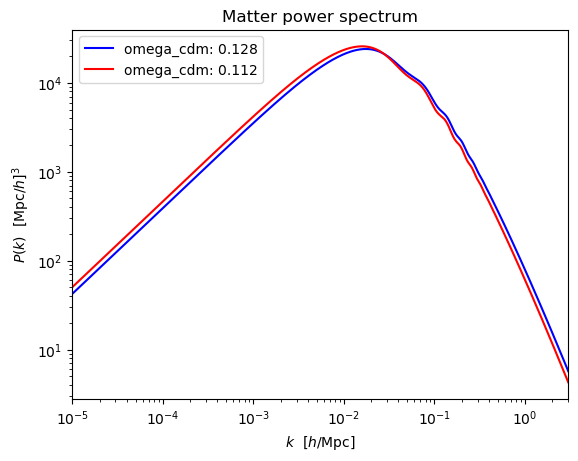

In [65]:
# omega_cdm: 0.112 vs 0.128
compare_matter_spectra(generate_new_params(params, 'omega_cdm', 0.128), generate_new_params(params, 'omega_cdm', 0.112), params["P_k_max_1/Mpc"], 'omega_cdm')

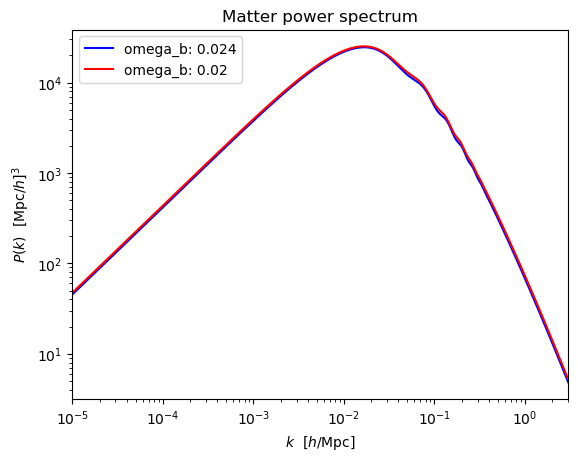

In [67]:
# omega_b: 0.020 vs 0.024
compare_matter_spectra(generate_new_params(params, 'omega_b', 0.024), generate_new_params(params, 'omega_b', 0.020), params["P_k_max_1/Mpc"], 'omega_b')

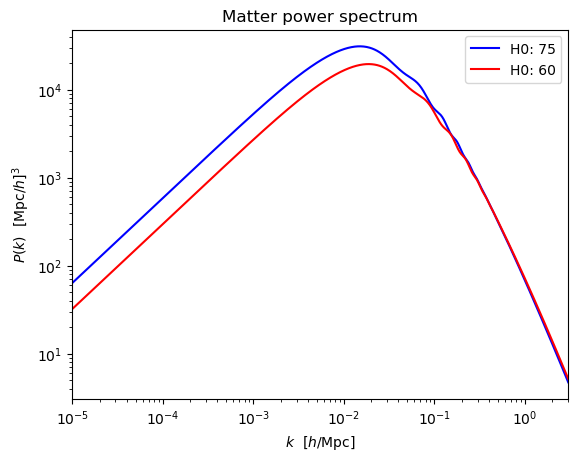

In [69]:
# H0: 60 vs. 75
compare_matter_spectra(generate_new_params(params, 'H0', 75), generate_new_params(params, 'H0', 60), params["P_k_max_1/Mpc"], 'H0')

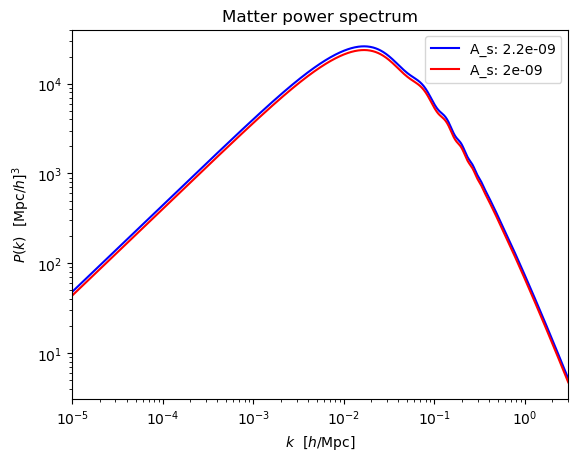

In [70]:
# A_s: 2.0e-9 vs. 2.2e-9
compare_matter_spectra(generate_new_params(params, 'A_s', 2.2e-9), generate_new_params(params, 'A_s', 2.0e-9), params["P_k_max_1/Mpc"], 'A_s')

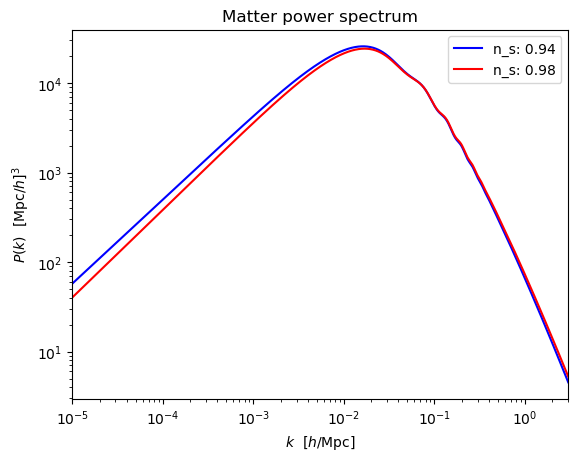

In [72]:
# n_s: 0.94 vs. 0.98
compare_matter_spectra(generate_new_params(params, 'n_s', 0.94), generate_new_params(params, 'n_s', 0.98), params["P_k_max_1/Mpc"], 'n_s')